<a href="https://colab.research.google.com/github/khalidmeister/IPBDataJam2019/blob/master/Text_Mining_dan_Eksplorasi_data_teks_PKM_2014_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informasi mengenai PKM
Program Kreativitas Mahasiswa (PKM) adalah suatu wadah yang dibentuk oleh **Direktorat Jenderal Pembelajaran dan Kemahasiswaan Kementerian Riset, Teknologi, dan Pendidikan Tinggi Republik Indonesia** dalam memfasilitasi potensi yang dimiliki mahasiswa Indonesia untuk mengkaji, mengembangkan, dan menerapkan ilmu dan teknologi yang telah dipelajarinya di perkuliahan kepada masyarakat luas. Program ini merupakan penerus dari Program Karya Alternatif Mahasiswa yang dibentuk pada tahun 1997, yang lalu berganti menjadi Program Kreativitas Mahasiswa tahun 2001 demi memperluas cakupan dan mengurangi batasan bagi mahasiswa dalam berkreasi.

PKM sendiri memiliki beberapa cabang, yakni:
1. PKM-P (PKM Penelitian)
2. PKM-K (PKM Kewirausahaan)
3. PKM-M (PKM Pengabdian Kepada Masyarakat)
4. PKM-T (PKM Teknologi)
5. PKM-KC (PKM Karsa Cipta)
6. PKM-GT (PKM Gagasan Tertulis)

Dari data tersebut, diharapkan mendapatkan suatu trend judul yang diberikan oleh tiap Universitas dan nantinya bisa dibuat generator judul PKM berdasarkan data peserta PIMNAS yang dimiliki 4 tahun ke belakang (2014-2018).

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
!pip install sastrawi

In [33]:
!git clone https://github.com/khalidmeister/IPBDataJam2019.git

fatal: destination path 'IPBDataJam2019' already exists and is not an empty directory.


In [34]:
! ls

IPBDataJam2019	sample_data


In [35]:
data = pd.ExcelFile('IPBDataJam2019/PESERTA_PIMNAS.xlsx')
df = data.parse(0)
df.head()

,No,Tahun,NIM,Ketua Pelaksana,SKIM,Perguruan Tinggi,Judul Kegiatan
0,1,2014,NaN,Rio Sena Eka Nurshidiq,PKM-GT,Institut Pertanian Bogor,Tata Perdagangan Perikanan Indonesia Melalui I...
1,2,2014,NaN,Aldri Fajar Muhammad,PKM-GT,Institut Pertanian Bogor,AGROCOASTAL’S SYSTEM : SOLUSI JANGKA PANJANG M...
2,3,2014,NaN,Kania Ariyani Risyalaina,PKM-GT,Institut Teknologi Nasional Bandung,PEMBENAHAN PERMUKIMAN PADAT DAN KUMUH DENGAN M...
3,4,2014,NaN,Danang Prayoga Setiawan,PKM-GT,Institut Teknologi Sepuluh Nopember,Application of Jakarta Floating Farm and Fishe...
4,5,2014,NaN,Fahmi Adha Nurdin,PKM-GT,Institut Teknologi Sepuluh Nopember,“SURABAYA UNDERGROUND AQUA PROJECT” KONSEP PEN...


In [36]:
df.shape

(2043, 7)

In [38]:
df = df[['Tahun', 'SKIM', 'Perguruan Tinggi', 'Judul Kegiatan']]
df.head()

,Tahun,SKIM,Perguruan Tinggi,Judul Kegiatan
0,2014,PKMGT,Institut Pertanian Bogor,tata perdagangan perikanan indonesia melalui i...
1,2014,PKMGT,Institut Pertanian Bogor,agrocoastals system solusi jangka panjang men...
2,2014,PKMGT,Institut Teknologi Nasional Bandung,pembenahan permukiman padat dan kumuh dengan m...
3,2014,PKMGT,Institut Teknologi Sepuluh Nopember,application of jakarta floating farm and fishe...
4,2014,PKMGT,Institut Teknologi Sepuluh Nopember,surabaya underground aqua project konsep penge...


In [39]:
#Melakukan pembersihan pada judul kegiatan baik dari penghilangan simbol dan melakukan dekapitalisasi hurud
df['Judul Kegiatan'] = df['Judul Kegiatan'].str.replace('[%s\“\’\”]' % re.escape(string.punctuation), '')
df['Judul Kegiatan'] = df['Judul Kegiatan'].str.lower()

# Melakukan Regex pada macam - macam lomba PKM
df['SKIM'] = df['SKIM'].str.replace('[\-\s]', '').astype('category')
df['SKIM'] = df['SKIM'].str.replace('[0-9]$', '')
df.head()

,Tahun,SKIM,Perguruan Tinggi,Judul Kegiatan
0,2014,PKMGT,Institut Pertanian Bogor,tata perdagangan perikanan indonesia melalui i...
1,2014,PKMGT,Institut Pertanian Bogor,agrocoastals system solusi jangka panjang men...
2,2014,PKMGT,Institut Teknologi Nasional Bandung,pembenahan permukiman padat dan kumuh dengan m...
3,2014,PKMGT,Institut Teknologi Sepuluh Nopember,application of jakarta floating farm and fishe...
4,2014,PKMGT,Institut Teknologi Sepuluh Nopember,surabaya underground aqua project konsep penge...


## Exploratory Data Analysis


Sebelum data tersebut dibuat pemodelan, terlebih dahulu dilakukan eksplorasi data. Eksplorasi ini bertujuan untuk mendapatkan insight apa saja yang didapatkan dari dataset tersebut. Misalnya saja disini ingin mengetahui 10 universitas yang mengikuti suatu cabang di PKM terbanyak.

In [45]:
df_cabang = df
df_cabang.head()

,Tahun,SKIM,Perguruan Tinggi,Judul Kegiatan
0,2014,PKMGT,Institut Pertanian Bogor,tata perdagangan perikanan indonesia melalui i...
1,2014,PKMGT,Institut Pertanian Bogor,agrocoastals system solusi jangka panjang men...
2,2014,PKMGT,Institut Teknologi Nasional Bandung,pembenahan permukiman padat dan kumuh dengan m...
3,2014,PKMGT,Institut Teknologi Sepuluh Nopember,application of jakarta floating farm and fishe...
4,2014,PKMGT,Institut Teknologi Sepuluh Nopember,surabaya underground aqua project konsep penge...


Dari data diatas, telah diketahui tahun, universitas, cabang PKM, dan judul kegiatan yang telah mereka ajukan. Disini saya melakukan pra-proses pada fitur SKIM sehingga elemen pada fitur tersebut bakal menjadi fitur. Dimana nantinya tiap fitur tersebut dijumlahkan dan dikelompokkan berdasarkan universitas yang mengampunya.

Proses tersebut dinamakan sebagai _One Hot Encoding_. One Hot Encoding ini adalah proses membentuk _dummy variable_ dari suatu fitur terutama fitur dengan tipe kategorik. Tiap elemen tersebut nantinya menjadi variabel tersendiri dan nilai elemennya 1 atau 0 dimana 1 itu melambangkan bahwa pengamatan ini mengikuti cabang tertentu. Syntaxnya seperti dibawah. Ini menggunakan library pandas dan metode __get_dummies()__

In [46]:
onehot = pd.get_dummies(df_cabang['SKIM'])
onehot.head()

,PKMGT,PKMK,PKMKC,PKMM,PKMP,PKMPE,PKMPSH,PKMT
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [0]:
df_cabang = df_cabang.drop('SKIM', axis = 1)

In [48]:
df_cabang = df.join(onehot)
df_cabang.head()

,Tahun,SKIM,Perguruan Tinggi,Judul Kegiatan,PKMGT,PKMK,PKMKC,PKMM,PKMP,PKMPE,PKMPSH,PKMT
0,2014,PKMGT,Institut Pertanian Bogor,tata perdagangan perikanan indonesia melalui i...,1,0,0,0,0,0,0,0
1,2014,PKMGT,Institut Pertanian Bogor,agrocoastals system solusi jangka panjang men...,1,0,0,0,0,0,0,0
2,2014,PKMGT,Institut Teknologi Nasional Bandung,pembenahan permukiman padat dan kumuh dengan m...,1,0,0,0,0,0,0,0
3,2014,PKMGT,Institut Teknologi Sepuluh Nopember,application of jakarta floating farm and fishe...,1,0,0,0,0,0,0,0
4,2014,PKMGT,Institut Teknologi Sepuluh Nopember,surabaya underground aqua project konsep penge...,1,0,0,0,0,0,0,0


In [117]:
df_ptn = df_cabang.groupby('Perguruan Tinggi').sum().sort_values('PKMK', ascending = False)
df_ptn = df_ptn.iloc[:, 1:]
df_ptn.head()

,PKMGT,PKMK,PKMKC,PKMM,PKMP,PKMPE,PKMPSH,PKMT
Perguruan Tinggi,,,,,,,,
Universitas Brawijaya,3,30,31,21,21,30,7,24
Universitas Gadjah Mada,12,26,37,19,16,31,10,10
Institut Pertanian Bogor,6,21,16,27,5,18,3,9
Universitas Diponegoro,1,19,27,21,1,30,4,4
Institut Teknologi Sepuluh Nopember,16,16,42,11,18,23,6,15


In [119]:
#temp = 0
#for i in df_ptn.columns:
  temp = temp + df_ptn.loc[:, i].astype(int)
df_ptn['Total'] = temp
df_ptn = df_ptn.sort_values('Total', ascending = False)
df_ptn.head()

,PKMGT,PKMK,PKMKC,PKMM,PKMP,PKMPE,PKMPSH,PKMT,Total
Perguruan Tinggi,,,,,,,,,
Universitas Brawijaya,3,30,31,21,21,30,7,24,167
Universitas Gadjah Mada,12,26,37,19,16,31,10,10,161
Institut Teknologi Sepuluh Nopember,16,16,42,11,18,23,6,15,147
Universitas Diponegoro,1,19,27,21,1,30,4,4,107
Institut Pertanian Bogor,6,21,16,27,5,18,3,9,105


In [120]:
df_ptn.columns

Index(['PKMGT', 'PKMK', 'PKMKC', 'PKMM', 'PKMP', 'PKMPE', 'PKMPSH', 'PKMT',
       'Total'],
      dtype='object')

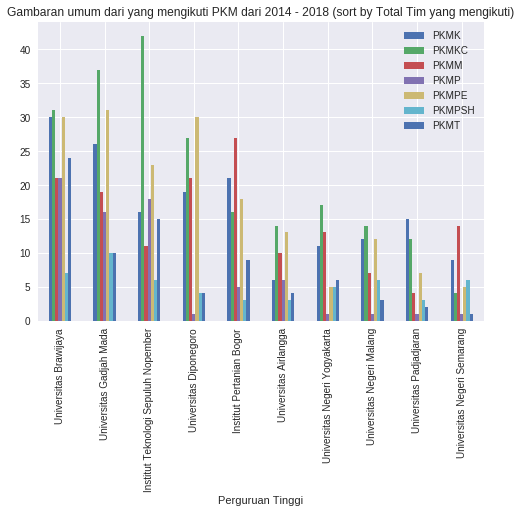

In [122]:
#df_ptn = df_cabang.groupby('Perguruan Tinggi').sum().sort_values('PKMKC', ascending = False)
df_ptn.iloc[0:10, 1:8].plot(kind = 'bar')
plt.title('Gambaran umum dari yang mengikuti PKM dari 2014 - 2018 (sort by Total Tim yang mengikuti)')
plt.show()

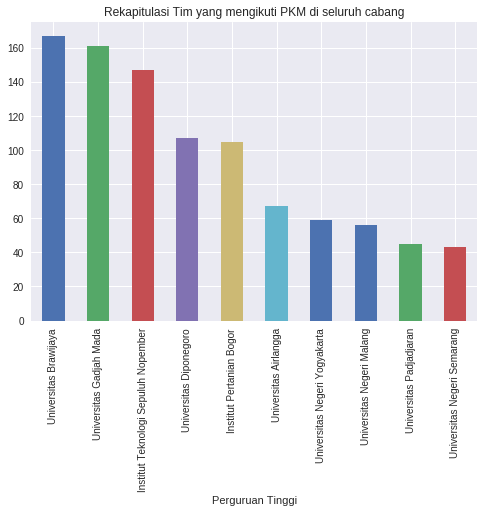

In [121]:
df_ptn.iloc[0:10, -1].plot(kind = 'bar')
plt.title('Rekapitulasi Tim yang mengikuti PKM di seluruh cabang')
plt.show()

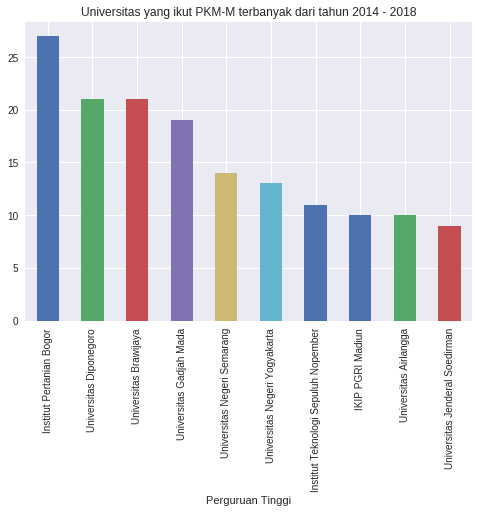

In [125]:
df_ptn = df_ptn.sort_values('PKMM', ascending = False)
df_ptn.iloc[0:10, 3].plot(kind = 'bar')
plt.title('Universitas yang ikut PKM-M terbanyak dari tahun 2014 - 2018')
plt.show()

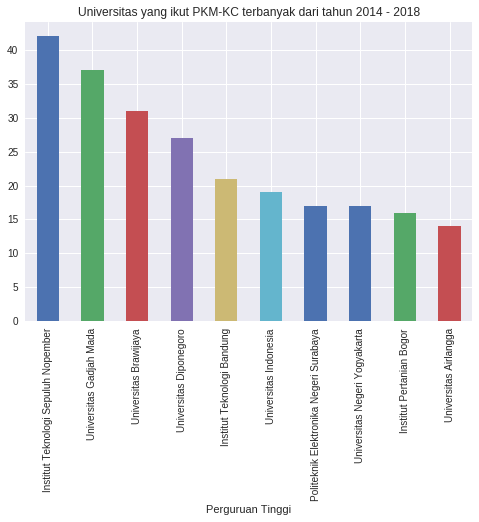

In [126]:
df_ptn = df_ptn.sort_values('PKMKC', ascending = False)
df_ptn.iloc[0:10, 2].plot(kind = 'bar')
plt.title('Universitas yang ikut PKM-KC terbanyak dari tahun 2014 - 2018')
plt.show()

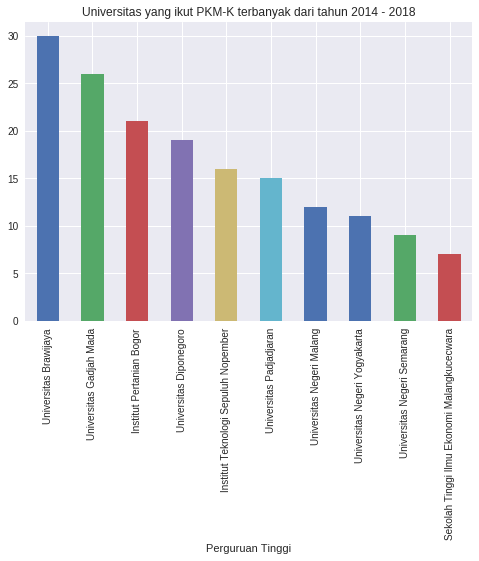

In [127]:
df_ptn = df_ptn.sort_values('PKMK', ascending = False)
df_ptn.iloc[0:10, 1].plot(kind = 'bar')
plt.title('Universitas yang ikut PKM-K terbanyak dari tahun 2014 - 2018')
plt.show()

## Pembuatan Model terhadap judul PKM
Untuk mendapatkan suatu makna yang baik dari suatu teks pada dataset, alangkah baiknya dilakukan beberapa pra proses. Diantaranya adalah:
- Tokenisasi Kalimat
- Menghilangkan Stop Word


### Menghilangkan Stop Word
Untuk menghilangkan stop word, bisa digunakan metode berikut:

In [0]:
from nltk.corpus import stopwords
stop_indo = list(set(stopwords.words('indonesian')))
stop_indo

['ditunjuki',
 'melihatnya',
 'tertentu',
 'diminta',
 'mulanya',
 'mengungkapkan',
 'haruslah',
 'apalagi',
 'sendirian',
 'dikatakannya',
 'pertama-tama',
 'usai',
 'kemudian',
 'menyeluruh',
 'buat',
 'berikan',
 'ketika',
 'ingat-ingat',
 'waktunya',
 'sejenak',
 'kala',
 'rata',
 'cara',
 'menginginkan',
 'selanjutnya',
 'mempergunakan',
 'mirip',
 'sekadarnya',
 'tadi',
 'enggaknya',
 'berarti',
 'kebetulan',
 'mau',
 'memulai',
 'menyiapkan',
 'misal',
 'setengah',
 'mempersoalkan',
 'diri',
 'tegasnya',
 'kamilah',
 'mula',
 'diberikannya',
 'dikerjakan',
 'jika',
 'mendatang',
 'secara',
 'dimaksudnya',
 'naik',
 'dijelaskannya',
 'akankah',
 'ditunjukkannya',
 'dia',
 'sampai-sampai',
 'siapa',
 'tanya',
 'berkenaan',
 'kelima',
 'bagai',
 'terasa',
 'waktu',
 'kami',
 'penting',
 'sambil',
 'ditanya',
 'meyakinkan',
 'katakan',
 'jelaslah',
 'tiba',
 'meminta',
 'diantara',
 'dialah',
 'menambahkan',
 'saatnya',
 'merasa',
 'menantikan',
 'sebagai',
 'tinggi',
 'per',
 'sebi

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = stop_indo)
X = cv.fit_transform(df['Judul Kegiatan'])
print(X.toarray())
#print(cv.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
